<a href="https://colab.research.google.com/github/Trung0Minh/AIO2023-MODULE-2/blob/main/SVD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

In [9]:
def compute_svd(matrix):
    U, V, V_T = np.linalg.svd(matrix)
    return U, V, V_T

In [6]:
A = np.array([[1,2,3],
              [4,5,6]])
U = np.dot(A, A.T)
V = np.dot(A.T, A)
U.shape, V.shape

((2, 2), (3, 3))

In [7]:
eigenvalues, eigenvectors = np.linalg.eig(U)
eigenvalues

array([ 0.59732747, 90.40267253])

In [8]:
eigenvalues, eigenvectors = np.linalg.eig(V)
eigenvalues

array([9.04026725e+01, 5.97327474e-01, 7.23299057e-16])

In [50]:
matrix = np.array([[7, 1], [0, 0], [5, 5]])
U, S, VT = compute_svd(matrix)
#S = np.diag(S)
print(np.matrix.round(S,2))
S

[9.49 3.16]


array([9.48683298, 3.16227766])

In [11]:
import cv2

def convertColorToGrayScale(image, ratio):
    img_gray = image @ ratio
    return np.around(img_gray).astype(np.uint8)

In [13]:
color_image = cv2.imread("/content/cat.jpeg")
color_image = cv2.resize(color_image, (300,300))
ratio_for_grayscale = [0.2126, 0.7152, 0.0722]
gray_image = convertColorToGrayScale(color_image, ratio_for_grayscale)
print(np.sum(gray_image))

6015657


In [20]:
def compute_cosine_similarity(matrix1, matrix2):
    matrix1 = np.ndarray.flatten(matrix1)
    matrix2 = np.ndarray.flatten(matrix2)
    return np.dot(matrix1, matrix2) / (np.linalg.norm(matrix1) * np.linalg.norm(matrix2))

In [21]:
A = np.array([[1,2,2], [3,2,2], [-2,1,-3]])
B = np.array([[4,2,4], [2,-2,5], [3,4,-4]])
result = compute_cosine_similarity(A,B)
print(np.round(result,2))

0.57


In [24]:
np.mean(A), (1+2+2+3+2+2+-2+1+-3)/9

(0.8888888888888888, 0.8888888888888888)

In [25]:
def compute_rms_error(matrix1, matrix2):
    return np.sqrt(np.mean(np.square(matrix1 - matrix2)))

In [27]:
A = np.array([[1,2,2], [3,2,2], [-2,1,-3]])
B = np.array([[4,2,4], [2,-2,5], [3,4,-4]])
result = compute_rms_error(A,B)
print(np.round(result,2))

2.87


In [28]:
def evaluate_svd_for_feature_compression_by_metric(gray_image, metric):
    U, S, VT = compute_svd(gray_image)
    k = len(S)
    S = np.diag(S)

    approx_list = []
    metric_list = []

    for i in range(1, k+1):
        approx = U[:,:i] @ S[:i,:] @ VT
        approx_list.append(approx)

        if metric == 0:
            metric_list.append(compute_cosine_similarity(gray_image, approx))
        elif metric == 1:
            metric_list.append(compute_rms_error(gray_image, approx))

    return metric_list, approx_list, k

In [39]:
color_image = cv2.imread("/content/cat.jpeg")
color_image = cv2.resize(color_image, (300,300))
ratio_for_grayscale = [0.2126, 0.7152, 0.0722]
gray_image = convertColorToGrayScale(color_image, ratio_for_grayscale)
metric_list, approx_list, k = evaluate_svd_for_feature_compression_by_metric(gray_image,1)
print(k)

300


In [36]:
import matplotlib.pyplot as plt

def draw_metric_information(metric_list, k):
    x_axis = list(range(1,k+1))
    plt.xlabel("k")
    plt.ylabel("metric")
    plt.plot(x_axis, metric_list)
    plt.show()

def draw_approx_image(approx_list, k):
    row = 6
    col = 4
    fig = plt.figure(figsize=(25, 25))
    fig_index = 1

    for i in range(0, k, 20):
        fig.add_subplot(row, col, fig_index)
        plt.imshow(approx_list[i], cmap='gray')
        plt.axis(False)
        plt.title(f"k = {i}")
        fig_index += 1

    plt.show()

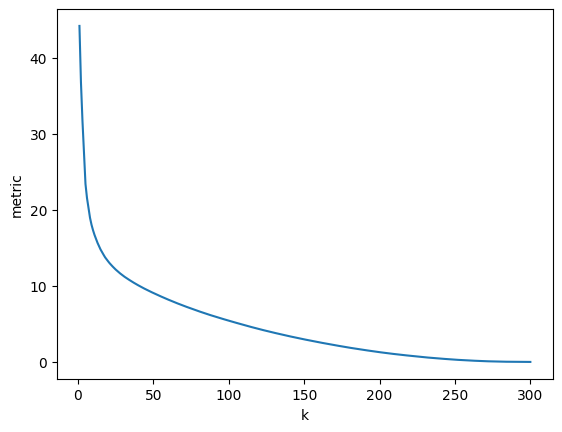

In [40]:
draw_metric_information(metric_list, k)

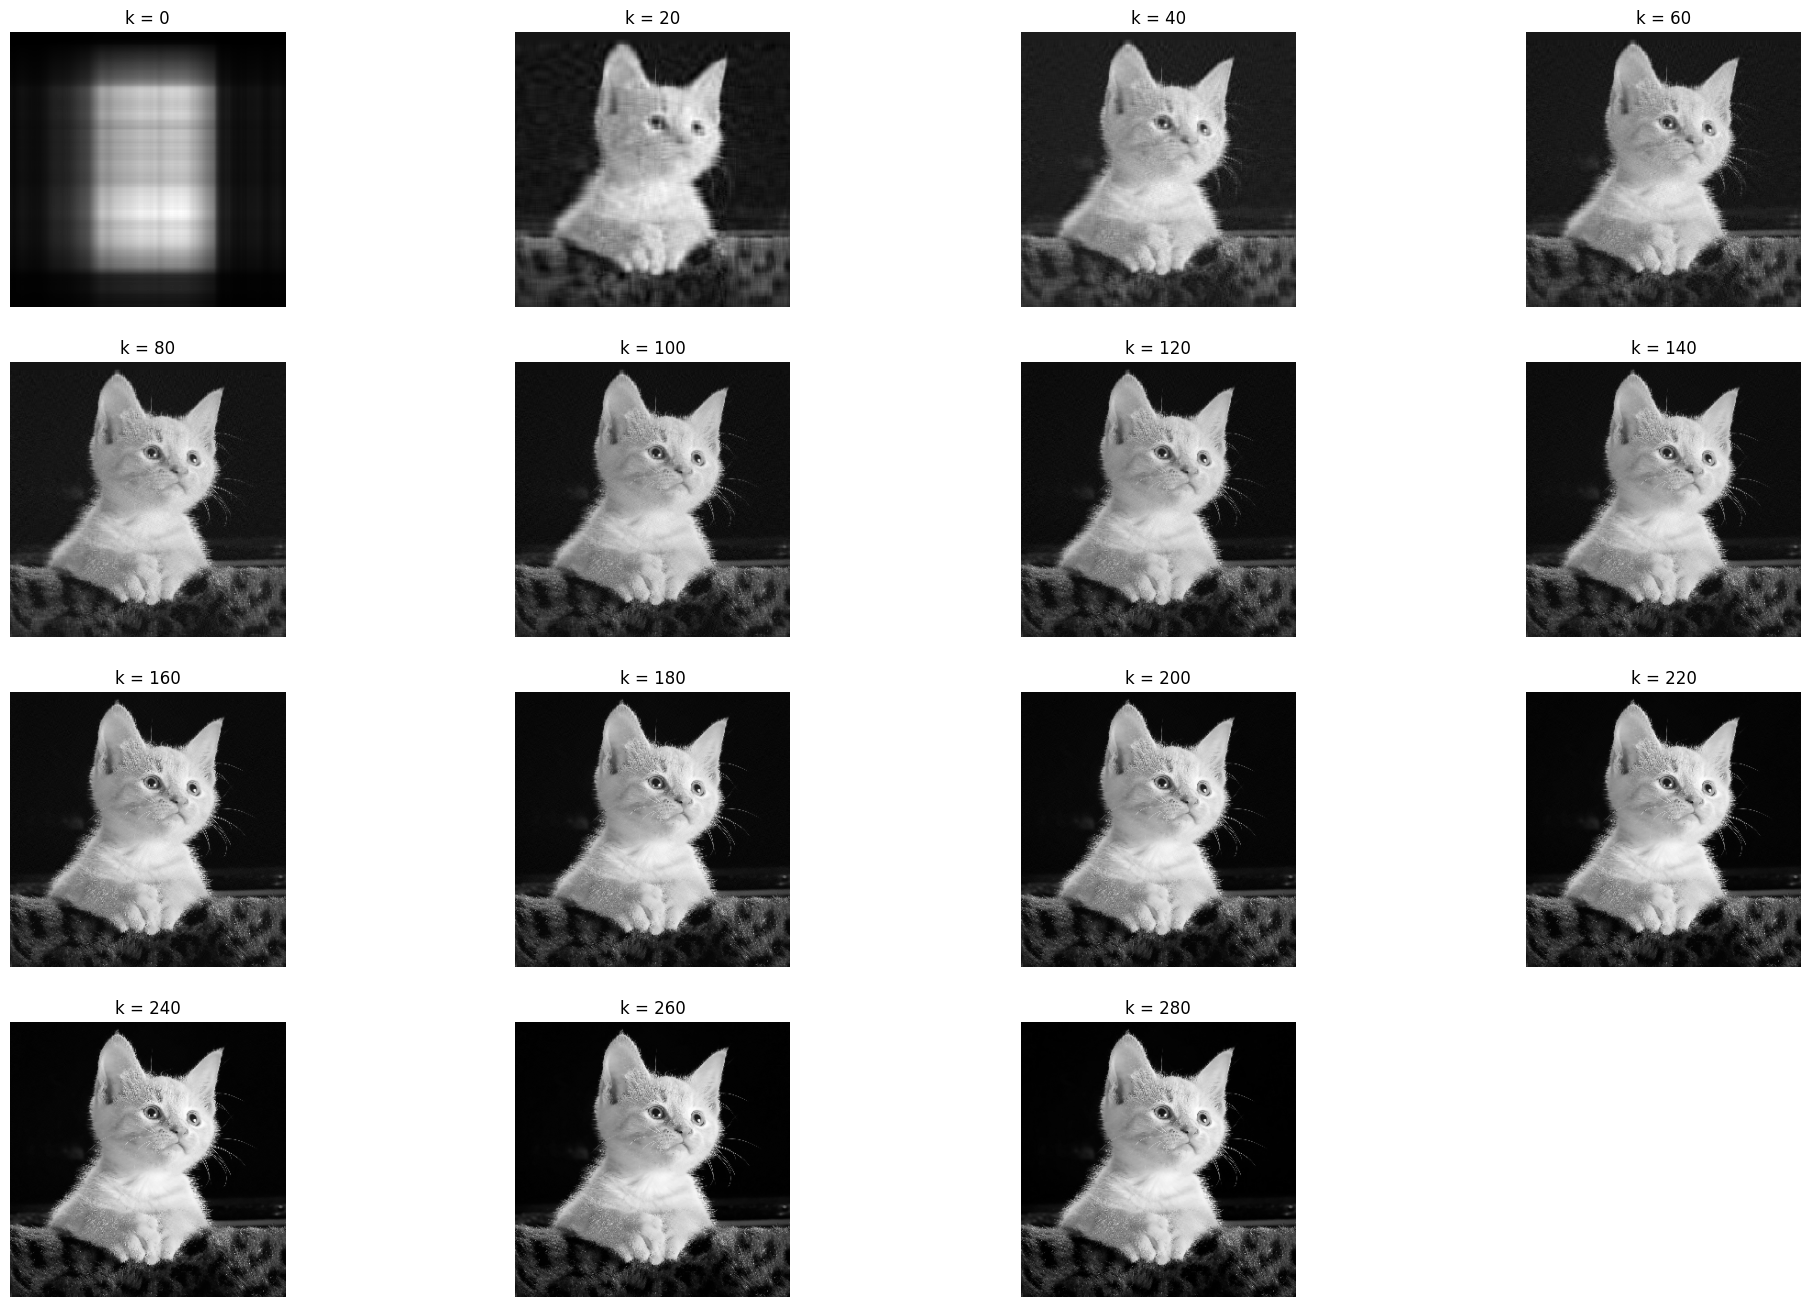

In [41]:
draw_approx_image(approx_list, k)

In [42]:
def addNoiseToImage(image, mean=0, stddev=25):
    noise = np.random.normal(mean, stddev, image.shape)
    noise = np.where(noise > 0, np.around(noise), 0)
    noise = noise.astype(np.uint8)
    np.save("noise.npy", noise)

    noise = np.load("noise.npy")
    return cv2.add(image, noise)

In [43]:
from google.colab.patches import cv2_imshow
color_image = cv2.imread("/content/cat.jpeg")
color_image = cv2.resize(color_image, (300,300))
ratio_for_grayscale = [0.2126, 0.7152, 0.0722]
gray_image = convertColorToGrayScale(color_image, ratio_for_grayscale)
noise_image = addNoiseToImage(gray_image)
avg_org = np.sum(gray_image)/(gray_image.shape[0]*gray_image.shape[1])
avg_noise = np.sum(noise_image)/(gray_image.shape[0]*gray_image.shape[1])
print("avg_org: ", round(avg_org,2))
print("avg_noise: ", round(avg_noise,2))

avg_org:  66.84
avg_noise:  76.67


In [46]:
def perform_image_denoise(noise_image, sigma_threshold):
    u, s, vh = np.linalg.svd(noise_image)
    s_cleaned = np.where(s > sigma_threshold, s, 0)
    s_cleaned = np.diag(s_cleaned)
    img_denoised = u @ s_cleaned @ vh
    return img_denoised

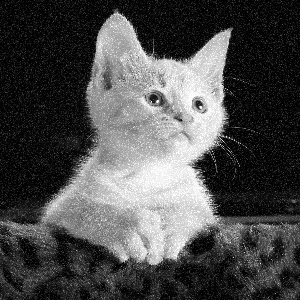

rms 17.19


In [47]:
#Read an colori mage
color_image = cv2.imread("/content/cat.jpeg")
color_image = cv2.resize(color_image, (300,300))
ratio_for_grayscale = [0.2126, 0.7152, 0.0722]
gray_image = convertColorToGrayScale(color_image, ratio_for_grayscale)
noise_gray_image = addNoiseToImage(gray_image, 0, 25)
#Perform image denois
sigma_threshold = 200
denoise_image = perform_image_denoise(noise_gray_image, sigma_threshold)
cv2_imshow(denoise_image)
similarity = compute_rms_error(denoise_image,gray_image)
print("rms", round(similarity,2))

In [48]:
similarity = compute_cosine_similarity(denoise_image,gray_image)
print("similarity", round(similarity,4))

similarity 0.9897


In [60]:
def find_best_sigma_image_denoise(noise_image, original_image, metric=0, sigma_range=1000):
    u, s, vh = np.linalg.svd(noise_image)
    print(max(s))
    evaluation_history = []

    for i in range(1, sigma_range):
        s_cleaned = np.where(s > i, s, 0)
        img_denoised = u @ np.diag(s_cleaned) @ vh

        if metric == 0:
            similarity = compute_cosine_similarity(img_denoised, original_image)
        elif metric == 1:
            similarity = compute_rms_error(img_denoised, original_image)

        evaluation_history.append(similarity)

    if metric == 0:
        best_index = evaluation_history.index(max(evaluation_history))
    elif metric == 1:
        best_index = evaluation_history.index(min(evaluation_history))

    return best_index, evaluation_history

In [61]:
def find_best_sigma_based_cosine():
    #Read an colori mage
    color_image = cv2.imread("/content/cat.jpeg")
    #Resize an image to (300,300)
    color_image = cv2.resize(color_image, (300,300))
    #Convert image to grayscale
    ratio_for_grayscale = [0.2126, 0.7152, 0.0722]
    gray_image = convertColorToGrayScale(color_image, ratio_for_grayscale)
    #Save resized grayscale image to file gray_image.png
    cv2.imwrite("gray_image.png", gray_image)
    # Add Gaussian noise to gray image
    noise_gray_image = addNoiseToImage(gray_image, 0, 25)
    #Save noisy grayscale image to file noise_gray_image.png
    cv2.imwrite("noise_gray_image.png", noise_gray_image)
    metric = 1 # for cosine similarity
    best_threshold, evaluation_history = find_best_sigma_image_denoise(noise_gray_image,
    gray_image, metric)
    print("best sigma: ", best_threshold)
find_best_sigma_based_cosine()

30691.303848157484
best sigma:  537


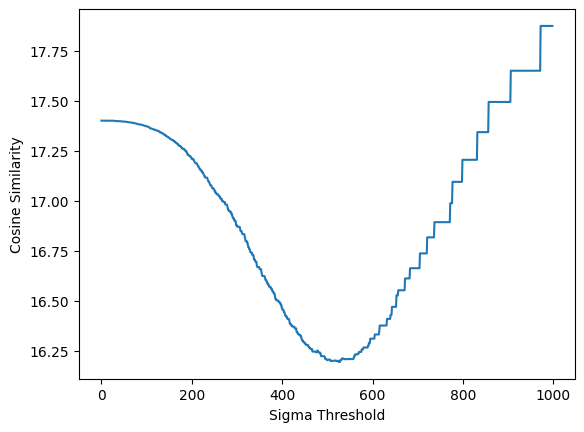

In [59]:
def plot_chart_based():
    #Read an colori mage
    color_image = cv2.imread("/content/cat.jpeg")
    #Resize an image to (300,300)
    color_image = cv2.resize(color_image, (300,300))
    #Convert image to grayscale
    ratio_for_grayscale = [0.2126, 0.7152, 0.0722]
    gray_image = convertColorToGrayScale(color_image, ratio_for_grayscale)
    #Save resized grayscale image to file gray_image.png
    cv2.imwrite("gray_image.png", gray_image)
    # Add Gaussian noise to gray image
    noise_gray_image = addNoiseToImage(gray_image, 0, 25)
    #Save noisy grayscale image to file noise_gray_image.png
    cv2.imwrite("noise_gray_image.png", noise_gray_image)
    metric = 1 # for cosine similarity
    best_threshold, evaluation_history = find_best_sigma_image_denoise(noise_gray_image,
    gray_image, metric)
    plt.plot(evaluation_history)
    plt.xlabel("Sigma Threshold")
    plt.ylabel("Cosine Similarity")
    plt.show()
plot_chart_based()